# Imports

In [1]:
import scanpy as sc
from tqdm import tqdm

import sys
sys.path.append('../../')
import GM

# Read adata containing structured latent

In [2]:
adata_structured = sc.read_h5ad(
    'adata_structured_balanced.h5ad'
)

adata = sc.AnnData(
    adata_structured.obsm['map_latent_summed'].copy(),
    obs=adata_structured.obs.copy(),
    obsm=adata_structured.obsm.copy()
)

/home/SE/miniconda3/envs/trials/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/SE/miniconda3/envs/trials/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [3]:
del adata_structured

# Filter-out ambiguous cell types

In [4]:
#adata = adata[adata.obs['cell_type'] != 'T']

# Get tree

In [5]:
tree_results = GM.get_tree(
    adata, 
    final_level=15,
    step=None,
    cell_type_key='cell_type',

    n_comps=26,
    standardize=False,
    random_state=42,
    n_pcs=30,
    obsm_key=None,
    dynamic_comps=False,
    )

Applying PCA
Applying PCA
Applying PCA
Applying PCA
Applying PCA
Applying PCA
Applying PCA


# Plot Tree

In [6]:
import os
save_path ='/data/scDisentangle figures/Kang/dendro'
os.makedirs(save_path, exist_ok=True)

saving to /data/scDisentangle figures/Kang/dendro


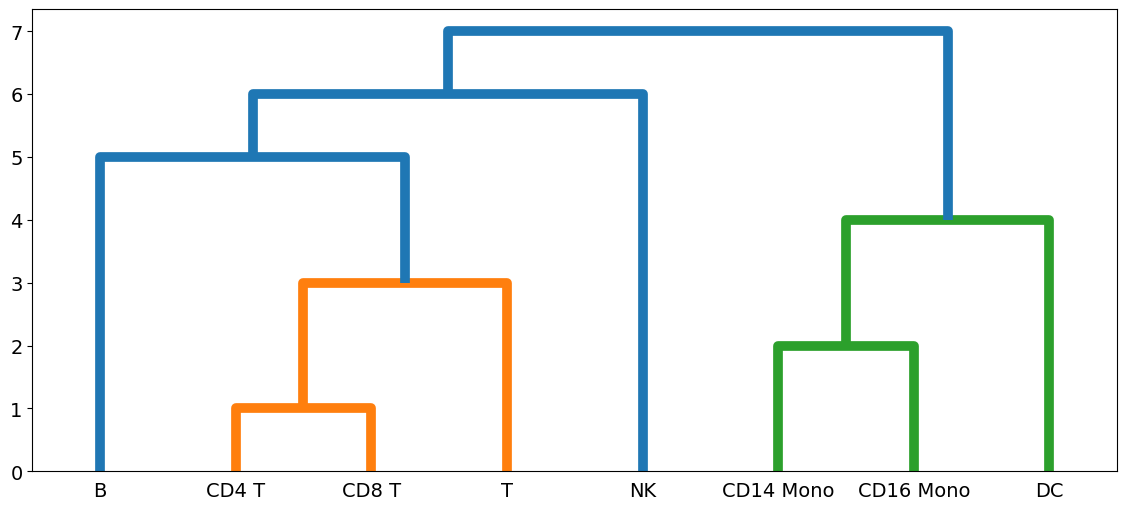

In [7]:
GM.plot_dendro(
    tree_results['linkage_mtx'], 
    tree_results['clusters'], 
    figsize=(14, 6),
    linewidth=7,
    orientation='top',
    save_path=f'{save_path}'
    )